<a href="https://colab.research.google.com/github/ghostwalkin/Cab_booking_prediction/blob/main/Cab_booking_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#1.Importing libraries

In [125]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_log_error
import os

# 2.Loading datasets



In [72]:
test_df=pd.read_csv('/content/test.csv')
test_label_df=pd.read_csv('/content/test_label.csv',header=None)
train_df=pd.read_csv('/content/train.csv')
train_label_df=pd.read_csv('/content/train_label.csv',header=None)

##Dataset description
shape,datatypes,missing values etc


In [73]:
print(test_df.shape)
test_df.head(1)

(2178, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.0,48,35.0008


In [74]:
print(test_label_df.shape)
test_label_df.columns=["total_bookings"]
test_label_df.head(1)

(2178, 1)


,total_bookings
0,256


In [75]:
print(train_df.shape)
train_df.head(1)

(8708, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,16.9979


In [76]:
print(train_label_df.shape)
train_label_df.columns=["total_bookings"]
train_label_df.head(1)

(8708, 1)


,total_bookings
0,504


In [77]:
df_train=pd.concat([train_df,train_label_df],axis=1,ignore_index=False)
df_train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,16.9979,504


In [78]:
df_test=pd.concat([test_df,test_label_df],axis=1,ignore_index=False)
df_test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.0,48,35.0008,256


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        8708 non-null   object 
 1   season          8708 non-null   object 
 2   holiday         8708 non-null   int64  
 3   workingday      8708 non-null   int64  
 4   weather         8708 non-null   object 
 5   temp            8708 non-null   float64
 6   atemp           8708 non-null   float64
 7   humidity        8708 non-null   int64  
 8   windspeed       8708 non-null   float64
 9   total_bookings  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [80]:
df_train.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
total_bookings    0
dtype: int64

Findings:
1. Test and train datas have same colums. Train and train_label datas are merged together to create a new df called df_train(training dataset); same has been done to the test dataset
2. No null values found in any columns
3. Datetime column is in string format; hence have to convert to datetime object format in net steps


##File Handling
mounting to google drive to access the dataframe even after disconnecting


In [81]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [82]:
#mkdir '/content/gdrive/MyDrive/MTP_B52'

In [83]:
df_train.to_csv('traindata.csv')
#!cp traindata.csv '/content/gdrive/MyDrive/MTP_B52'
df_test.to_csv('testdata.csv')
#!cp testdata.csv '/content/gdrive/MyDrive/MTP_B52'

In [84]:
#path1='/content/gdrive/MyDrive/MTP_B52/traindata.csv'
#path2='/content/gdrive/MyDrive/MTP_B52/testdata.csv'
df_train=pd.read_csv('traindata.csv',index_col=[0])
df_test=pd.read_csv('testdata.csv',index_col=[0])

In [85]:
df_train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.76,77,16.9979,504


In [86]:
df_test.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.0,48,35.0008,256


#3.Feature Engineering


creating hour,month and weekday column

In [87]:
df_train['datetime']=df_train['datetime'].apply(pd.to_datetime)
df_train.insert(loc=1,column='hour',value=df_train.datetime.dt.hour)
df_train.insert(loc=2,column='month',value=df_train.datetime.dt.month)
df_train.insert(loc=3,column='weekday',value=df_train.datetime.dt.day_name())
df_train.drop(axis=1,columns='datetime',inplace=True)
df_train.columns
df_train.columns

Index(['hour', 'month', 'weekday', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'total_bookings'],
      dtype='object')

In [88]:
df_train[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']] = df_train[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']].astype('category')

In [89]:
df_train.head(10)

,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,19,5,Wednesday,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,4,9,Wednesday,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,9,1,Thursday,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,16,11,Friday,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,13,9,Tuesday,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
5,17,8,Friday,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791
6,9,10,Saturday,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395
7,4,9,Monday,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5
8,4,7,Saturday,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9
9,18,2,Sunday,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78


In [90]:
labelencoder = LabelEncoder()

df_train['hour'] = labelencoder.fit_transform(df_train['hour'])
df_train['month'] = labelencoder.fit_transform(df_train['month'])
df_train['weekday'] = labelencoder.fit_transform(df_train['weekday'])
df_train['season'] = labelencoder.fit_transform(df_train['season'])
df_train['holiday'] = labelencoder.fit_transform(df_train['holiday'])
df_train['workingday'] = labelencoder.fit_transform(df_train['workingday'])
df_train['weather'] = labelencoder.fit_transform(df_train['weather'])
df_train.head(10)

,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,19,4,6,2,0,1,0,22.14,25.760,77,16.9979,504
1,4,8,6,0,0,1,0,28.70,33.335,79,19.0012,5
2,9,0,4,1,0,1,0,5.74,6.060,50,22.0028,139
3,16,10,0,3,0,1,0,13.94,16.665,29,8.9981,209
4,13,8,5,0,0,1,0,30.34,33.335,51,19.0012,184
5,17,7,0,0,0,1,0,33.62,12.120,36,22.0028,791
6,9,9,2,3,0,0,0,24.60,29.545,73,12.9980,395
7,4,8,1,0,0,1,0,21.32,25.000,68,19.0012,5
8,4,6,2,0,0,0,2,27.06,31.060,61,7.0015,9
9,18,1,3,1,0,0,0,12.30,15.150,56,11.0014,78


In [91]:
df_test['datetime']=df_test['datetime'].apply(pd.to_datetime)
df_test.insert(loc=1,column='hour',value=df_test.datetime.dt.hour)
df_test.insert(loc=2,column='month',value=df_test.datetime.dt.month)
df_test.insert(loc=3,column='weekday',value=df_test.datetime.dt.day_name())
df_test.drop(axis=1,columns='datetime',inplace=True)
df_test.head(10)

,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,11,5,Thursday,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,7,6,Saturday,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,20,3,Sunday,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,11,10,Thursday,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,12,6,Saturday,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668
5,23,4,Friday,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032,53
6,18,5,Sunday,Summer,0,0,Clear + Few clouds,22.96,26.515,78,16.9979,237
7,18,11,Thursday,Winter,0,1,Mist + Cloudy,16.40,20.455,50,11.0014,678
8,16,10,Friday,Winter,0,1,Clear + Few clouds,18.86,22.725,41,23.9994,520
9,3,3,Friday,Spring,0,1,Clear + Few clouds,14.76,17.425,71,12.9980,5


continious to categrical variable using label encoder

In [92]:
df_test[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']] = df_test[['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']].astype('category')
labelencoder = LabelEncoder()

df_test['hour'] = labelencoder.fit_transform(df_test['hour'])
df_test['month'] = labelencoder.fit_transform(df_test['month'])
df_test['weekday'] = labelencoder.fit_transform(df_test['weekday'])
df_test['season'] = labelencoder.fit_transform(df_test['season'])
df_test['holiday'] = labelencoder.fit_transform(df_test['holiday'])
df_test['workingday'] = labelencoder.fit_transform(df_test['workingday'])
df_test['weather'] = labelencoder.fit_transform(df_test['weather'])

df_test.head(10)
#df_test.shape

,hour,month,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,total_bookings
0,11,4,4,2,0,1,0,21.32,25.000,48,35.0008,256
1,7,5,2,2,0,0,0,23.78,27.275,64,7.0015,87
2,20,2,3,1,0,0,1,11.48,12.120,100,27.9993,11
3,11,9,4,3,0,1,2,25.42,28.790,83,0.0000,84
4,12,5,2,2,0,0,0,25.42,31.060,43,23.9994,668
5,23,3,0,2,0,1,0,12.30,15.910,61,6.0032,53
6,18,4,3,2,0,0,0,22.96,26.515,78,16.9979,237
7,18,10,4,3,0,1,2,16.40,20.455,50,11.0014,678
8,16,9,0,3,0,1,0,18.86,22.725,41,23.9994,520
9,3,2,0,1,0,1,0,14.76,17.425,71,12.9980,5


In [93]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 0 to 2177
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour            2178 non-null   int64  
 1   month           2178 non-null   int64  
 2   weekday         2178 non-null   int64  
 3   season          2178 non-null   int64  
 4   holiday         2178 non-null   int64  
 5   workingday      2178 non-null   int64  
 6   weather         2178 non-null   int64  
 7   temp            2178 non-null   float64
 8   atemp           2178 non-null   float64
 9   humidity        2178 non-null   int64  
 10  windspeed       2178 non-null   float64
 11  total_bookings  2178 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 221.2 KB


In [94]:
df_train.columns

Index(['hour', 'month', 'weekday', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'total_bookings'],
      dtype='object')

In [95]:
df_test.columns

Index(['hour', 'month', 'weekday', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'total_bookings'],
      dtype='object')

#4.Outlier Analysis



<AxesSubplot:>

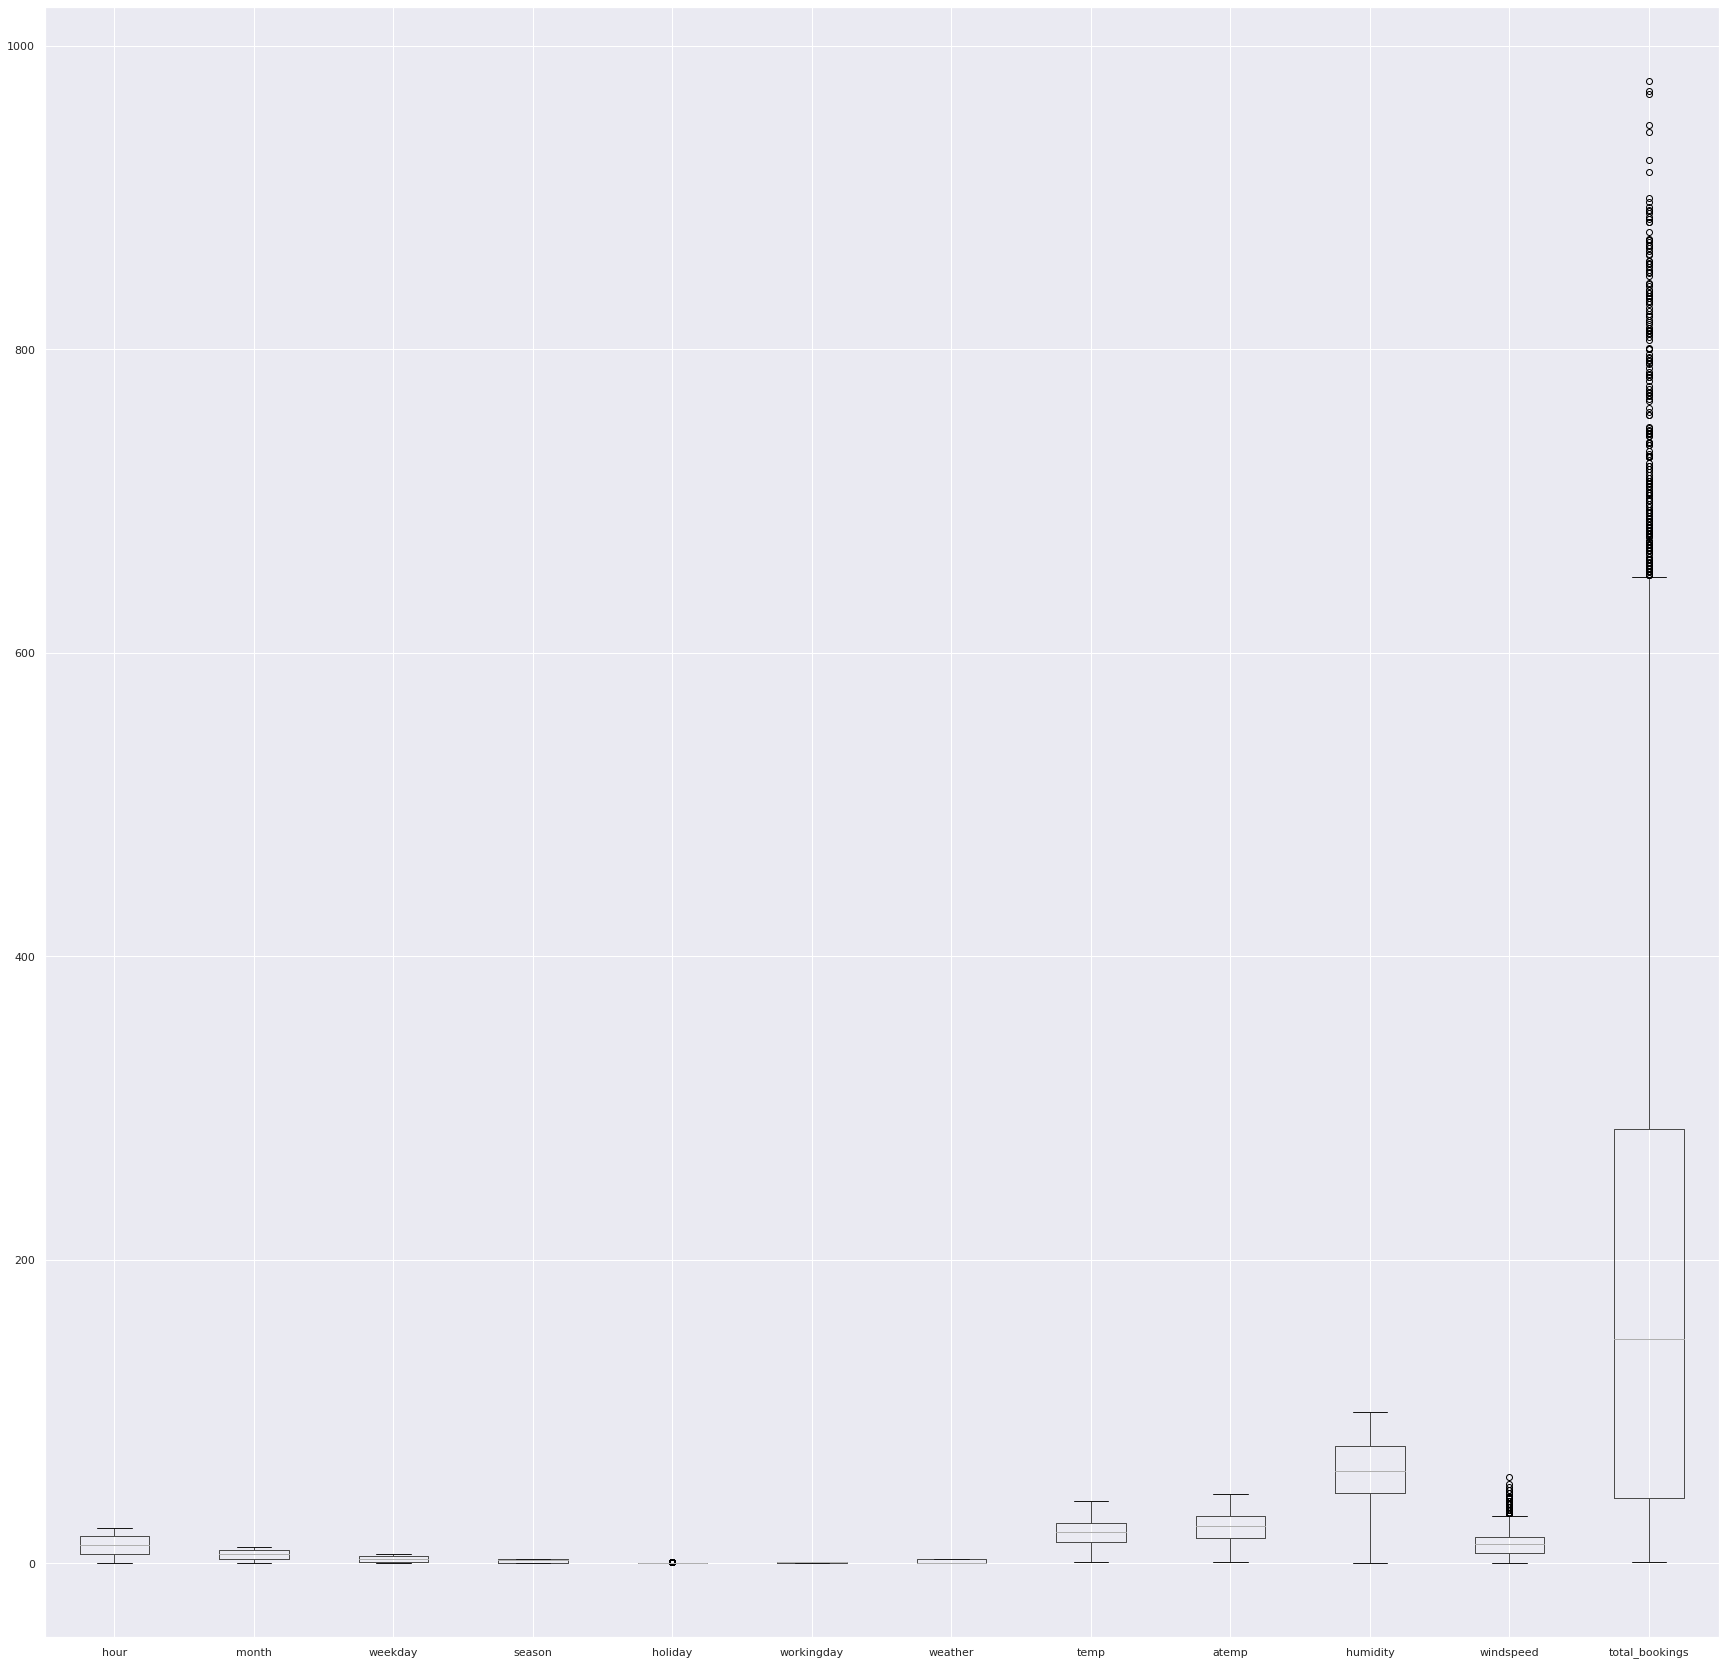

In [96]:
df_train.boxplot(figsize=(30,30))

<AxesSubplot:>

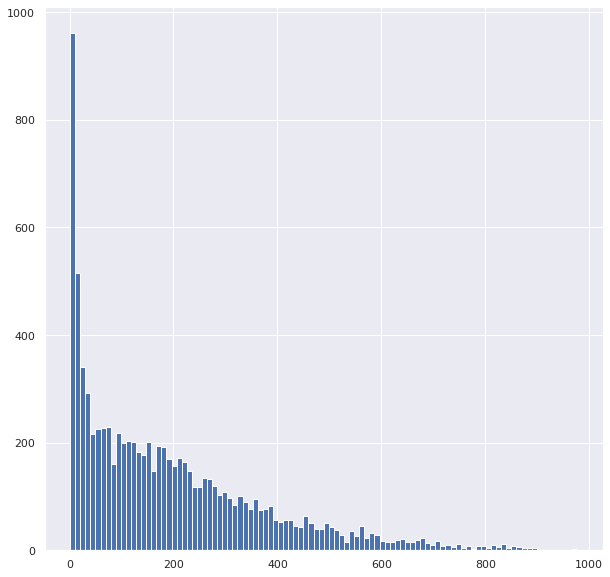

In [97]:
df_train['total_bookings'].hist(bins=100,figsize=(10,10))

In [98]:
print(df_train['total_bookings'][df_train['total_bookings']<int(df_train['total_bookings'].mode())].count())

422


In [99]:
df_train['total_bookings'].mode()

0    5
dtype: int64

In [100]:
df_train['total_bookings'][df_train['total_bookings']==5].count()

129

In [101]:
df_train['workingday'][df_train['total_bookings']<5].value_counts()

1    340
0     82
Name: workingday, dtype: int64

*NO outliers as there is a good distribution of all values

# 5.Correlation Analysis

<AxesSubplot:>

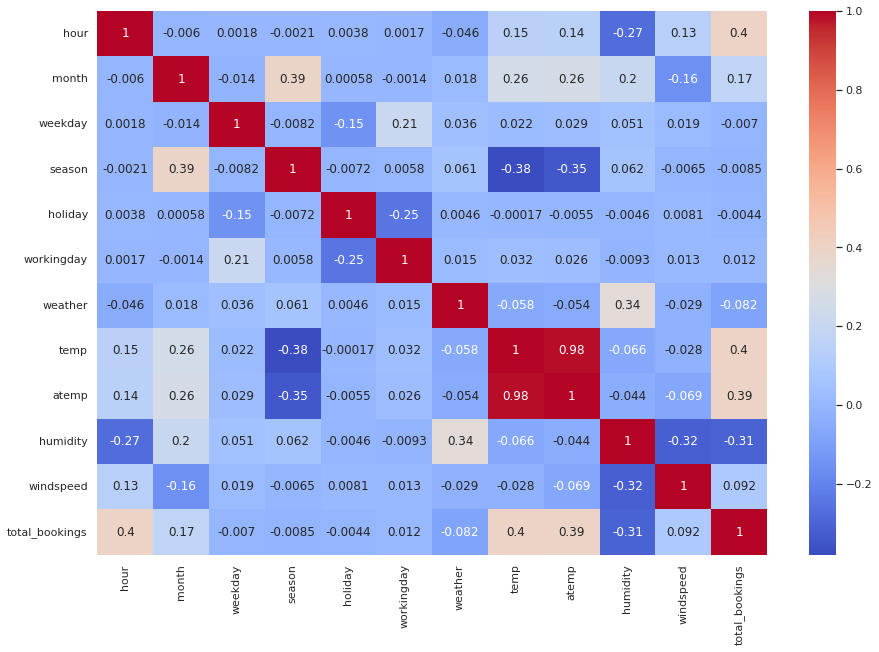

In [102]:
sns.set(rc={"figure.figsize":(15,10)})
corr = df_train.corr()
sns.heatmap(corr, annot = True,cmap='coolwarm')

Corelation: from the heatmap total bookings have medium dependency on temp,atemp,humidity,month and hour, but low dependency on other attributes

#6.Data visualisation

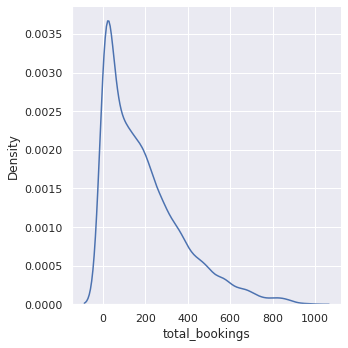

In [103]:
sns.displot(data=df_train, x='total_bookings', kind='kde')

<AxesSubplot:xlabel='temp', ylabel='total_bookings'>

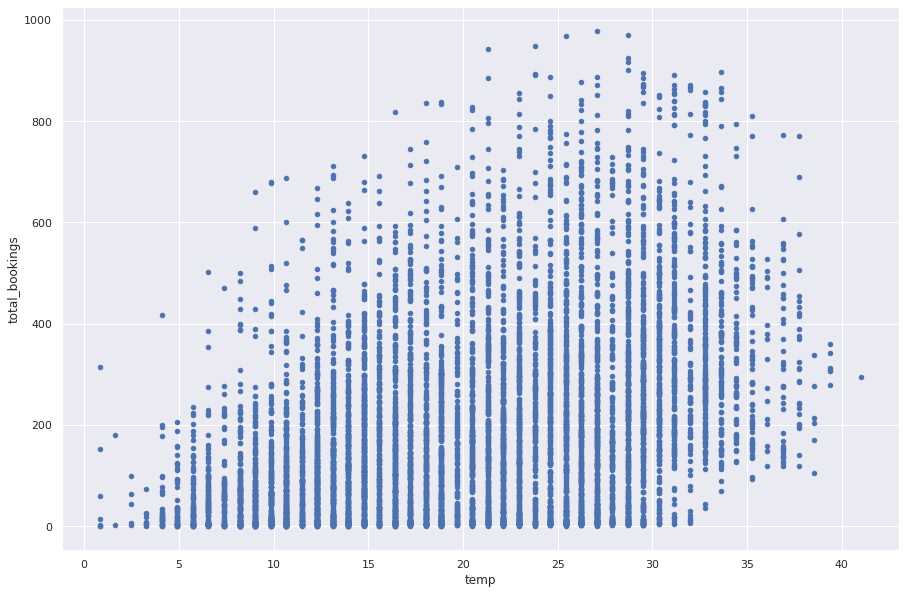

In [104]:
df_train.plot(kind='scatter', x='temp', y='total_bookings')

<AxesSubplot:xlabel='atemp', ylabel='total_bookings'>

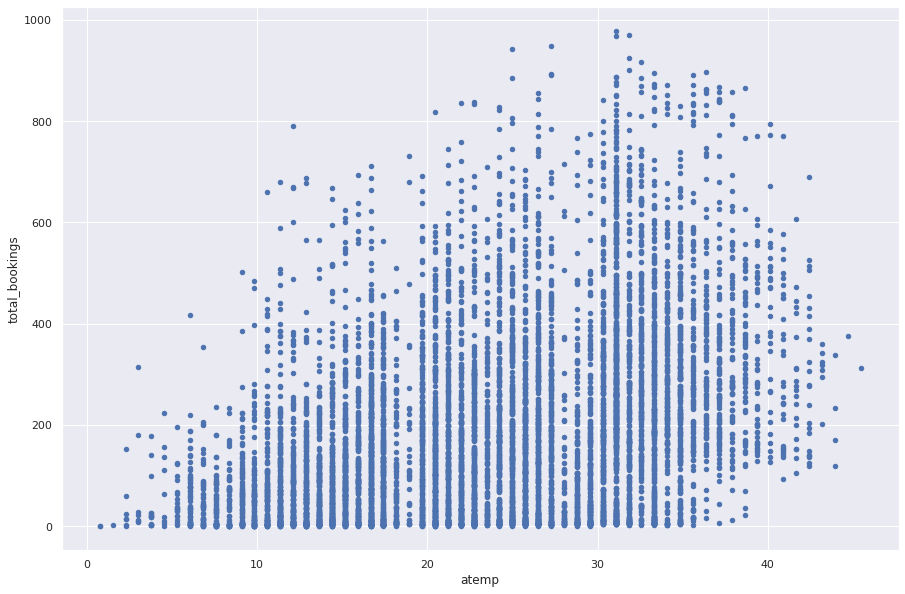

In [105]:
df_train.plot(kind='scatter', x='atemp', y='total_bookings')

<AxesSubplot:xlabel='humidity', ylabel='total_bookings'>

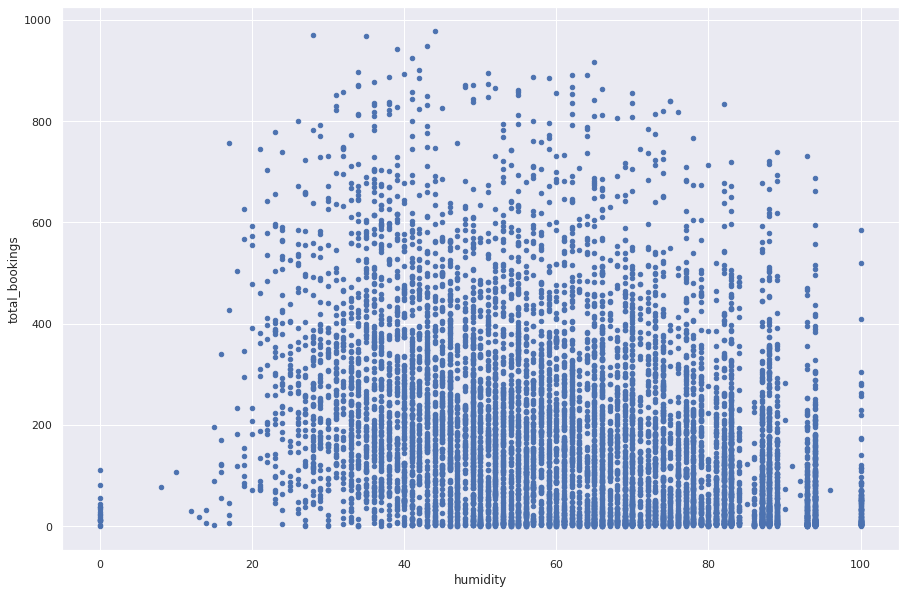

In [106]:
df_train.plot(kind='scatter', x='humidity', y='total_bookings')

<AxesSubplot:xlabel='month', ylabel='total_bookings'>

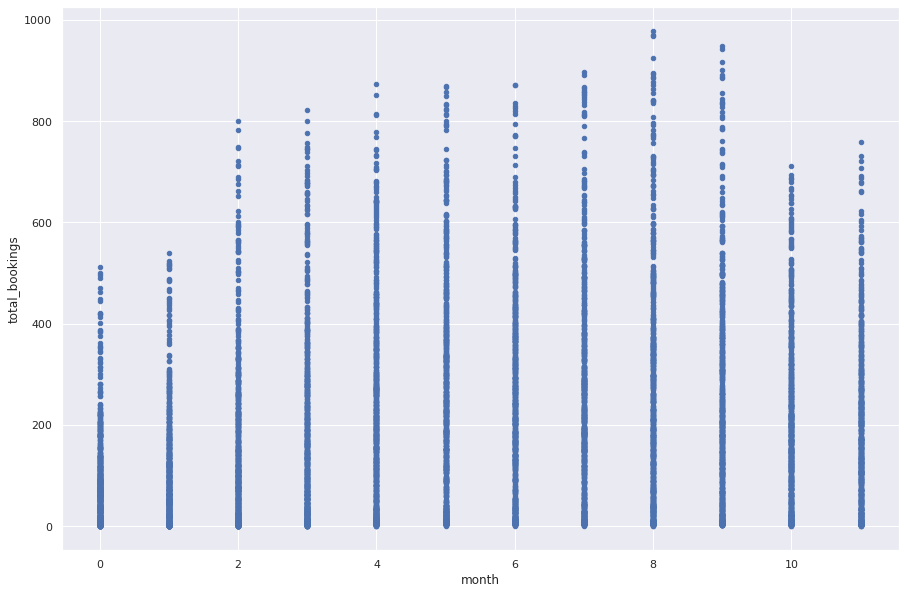

In [107]:
df_train.plot(kind='scatter', x='month', y='total_bookings')

<AxesSubplot:xlabel='hour', ylabel='total_bookings'>

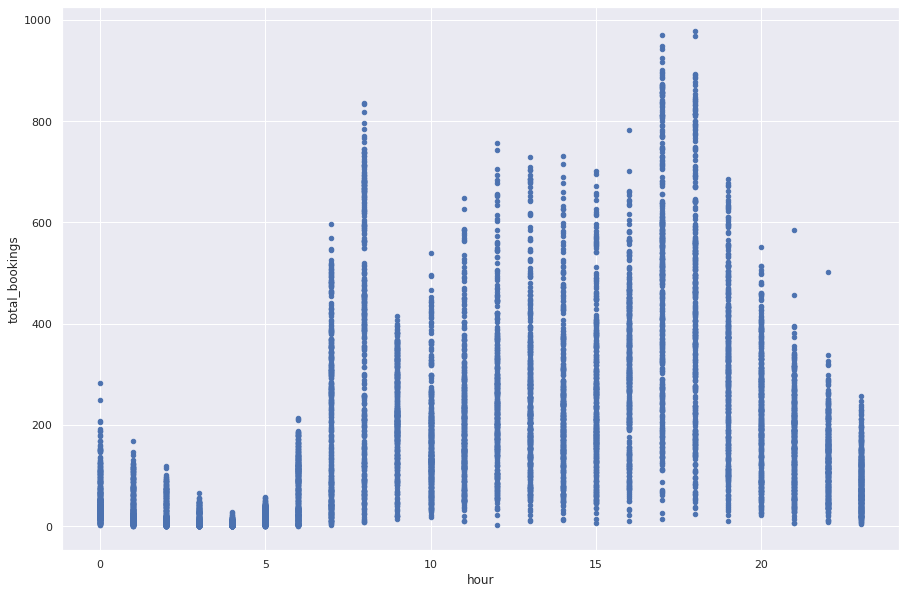

In [108]:
df_train.plot(kind='scatter', x='hour', y='total_bookings')

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'total_bookings'}>, <AxesSubplot:>]],
      dtype=object)

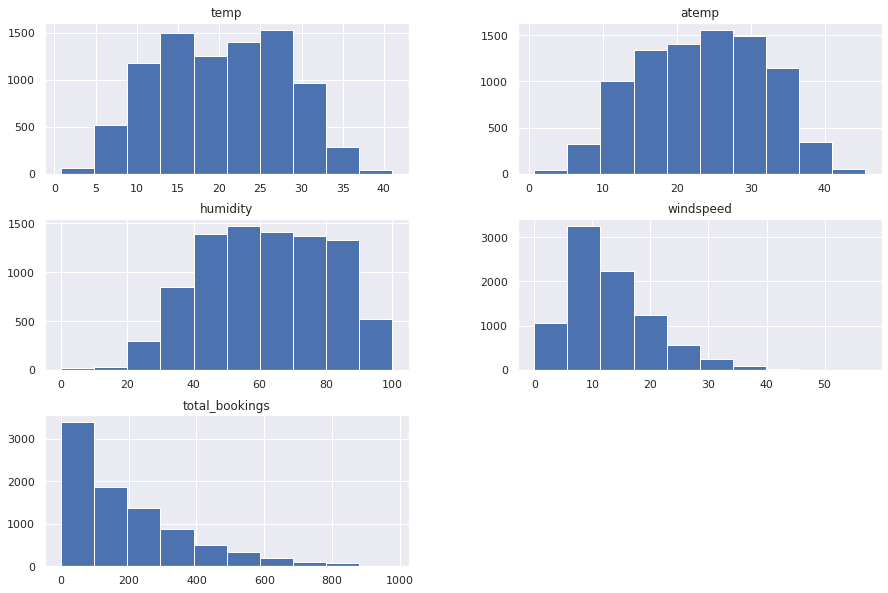

In [109]:
df_train.hist(column=['temp', 'atemp', 'humidity', 'windspeed', 'total_bookings'],grid=True,bins=10)

#7.Categorical to one hot vector


In [110]:
cat_vars=['hour', 'month', 'weekday', 'season', 'holiday', 'workingday', 'weather']
df_train=pd.get_dummies(df_train,columns=cat_vars)
df_test=pd.get_dummies(df_test,columns=cat_vars)

In [111]:
df_train.head(2)

,temp,atemp,humidity,windspeed,total_bookings,hour_0,hour_1,hour_2,hour_3,hour_4,...,season_2,season_3,holiday_0,holiday_1,workingday_0,workingday_1,weather_0,weather_1,weather_2,weather_3
0,22.14,25.760,77,16.9979,504,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
1,28.70,33.335,79,19.0012,5,0,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0


In [112]:
df_test.head(2)

,temp,atemp,humidity,windspeed,total_bookings,hour_0,hour_1,hour_2,hour_3,hour_4,...,season_1,season_2,season_3,holiday_0,holiday_1,workingday_0,workingday_1,weather_0,weather_1,weather_2
0,21.32,25.000,48,35.0008,256,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
1,23.78,27.275,64,7.0015,87,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [113]:
df_test['weather_2'].dtype

dtype('uint8')

In [114]:
#as weather_3 is present in df_train and not in df_test adding a colum with all 0 values and uint8 dtype
df_test = df_test.assign(weather_3=pd.Series([0]*len(df_test), dtype='uint8'))

#8.X-Y Split
no need to split test train as already 2 dataset present

In [115]:
x_train=df_train.drop('total_bookings', axis=1)
y_train=df_train['total_bookings']
x_test=df_test.drop('total_bookings', axis=1)
y_test=df_test['total_bookings']

#9.Fit various models (Random Forest Regressor, Ada Boost Regressor, BaggingRegressor, SVR, and K-Neighbors Regressor)

In [116]:
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
bg = BaggingRegressor()
svr = SVR()
knn = KNeighborsRegressor()

rf.fit(x_train, y_train)
ab.fit(x_train, y_train)
bg.fit(x_train, y_train)
svr.fit(x_train, y_train)
knn.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
ab_pred = ab.predict(x_test)
bg_pred = bg.predict(x_test)
svr_pred = svr.predict(x_test)
knn_pred = knn.predict(x_test)

# 10.RMSEvalues achieved by different modeling algorithm

In [117]:
print(f"Random Forest Regressor RMSE: {mean_squared_error(y_test, rf_pred, squared=False)}")
print(f"Ada Boost Regressor RMSE: {mean_squared_error(y_test, ab_pred, squared=False)}")
print(f"Bagging Regressor RMSE: {mean_squared_error(y_test, bg_pred, squared=False)}")
print(f"Support Vector Regressor RMSE: {mean_squared_error(y_test, svr_pred, squared=False)}")
print(f"K-Neighbors Regressor RMSE: {mean_squared_error(y_test, knn_pred, squared=False)}")

Random Forest Regressor RMSE: 76.61721526972525
Ada Boost Regressor RMSE: 151.64008937009666
Bagging Regressor RMSE: 81.33432826404139
Support Vector Regressor RMSE: 159.60632225279164
K-Neighbors Regressor RMSE: 154.54721769641898


#11.Hyper-parameter tuning on the best model using GridSearchCV

In [123]:
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

ada_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
}

bag_param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
}

svr_param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10],
}

knn_param_grid = {
    "n_neighbors": [3, 5, 7],
    "weights": ["uniform", "distance"],
}


# Fit the GridSearchCV on the training data
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)

ada_grid = GridSearchCV(ab, ada_param_grid, cv=5)
ada_grid.fit(x_train, y_train)

bag_grid = GridSearchCV(bg, bag_param_grid, cv=5)
bag_grid.fit(x_train, y_train)

svr_grid = GridSearchCV(svr, svr_param_grid, cv=5)
svr_grid.fit(x_train, y_train)

knn_grid = GridSearchCV(knn, knn_param_grid, cv=5)
knn_grid.fit(x_train, y_train)

# Print the best parameters for each model
print("Random Forest Regressor:", rf_grid.best_params_)
print("Ada Boost Regressor:", ada_grid.best_params_)
print("Bagging Regressor:", bag_grid.best_params_)
print("Support Vector Regressor:", svr_grid.best_params_)
print("K-Neighbors Regressor:", knn_grid.best_params_)

KeyboardInterrupt: ignored

#12.Mean_squared_log_error



In [126]:
rf_mse = mean_squared_log_error(y_test, rf_pred)
ab_mse = mean_squared_log_error(y_test, ab_pred)
bg_mse = mean_squared_log_error(y_test, bg_pred)
svr_mse = mean_squared_log_error(y_test, svr_pred)
knn_mse = mean_squared_log_error(y_test, knn_pred)

print("Random Forest Mean Squared Log Error:", rf_mse)
print("AdaBoost Mean Squared Log Error:", ab_mse)
print("Bagging Mean Squared Log Error:", bg_mse)
print("SVR Mean Squared Log Error:", svr_mse)
print("KNN Mean Squared Log Error:", knn_mse)

Random Forest Mean Squared Log Error: 0.2865221717924743
AdaBoost Mean Squared Log Error: 2.6120868979495695
Bagging Mean Squared Log Error: 0.3151721179843654
SVR Mean Squared Log Error: 1.684778040669618
KNN Mean Squared Log Error: 1.6750019206859526
